In [485]:
pwd

'c:\\Users\\chsan\\OneDrive\\Desktop\\ML\\course1\\stage5'

# Univariate anlysis and EDD in python

In [486]:
import numpy as np
import pandas as pd
import seaborn as sns

In [487]:
df = pd.read_csv("C:/Users/chsan/OneDrive/Desktop/ML/course1/data/House_price.csv", header = 0)

In [488]:
df.info()
# here there is a problem
# None in waterbody is treated as None in python, but it should be treated as "None"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [489]:
# Probelem of "None" in water body is solved by the following way of apssing parameters
df = pd.read_csv("C:/Users/chsan/OneDrive/Desktop/ML/course1/data/House_price.csv", header = 0, na_values = [''], keep_default_na = False)

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [491]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [492]:
df.shape

(506, 19)

In [493]:
# running EDD on this data
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [494]:
# observation
# There are 8 missing values in n_hos_beds


In [495]:
# crime is negatively skewed
# see the percentile

In [496]:
# May be there are outliers in n_hot_rooms

In [497]:
# you should always look EDD before starting anlysis

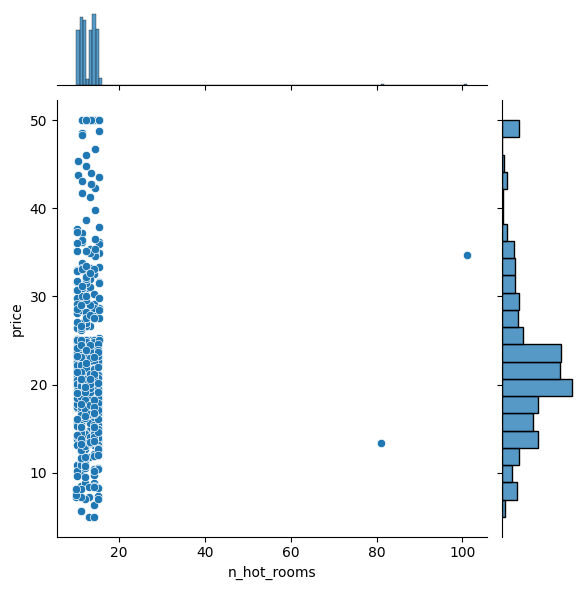

In [498]:
sns.jointplot(x = "n_hot_rooms", y = "price", data = df)

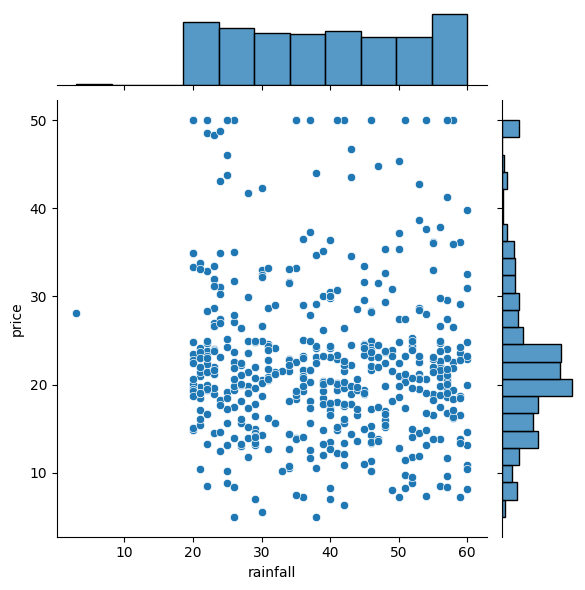

In [499]:
sns.jointplot(x = "rainfall", y = "price", data = df)

<Axes: xlabel='airport', ylabel='count'>

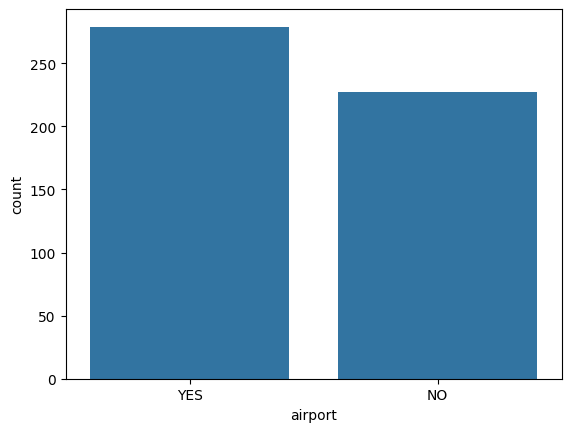

In [500]:
# categorical variable airport
sns.countplot(x = "airport",  data = df)

<Axes: xlabel='waterbody', ylabel='count'>

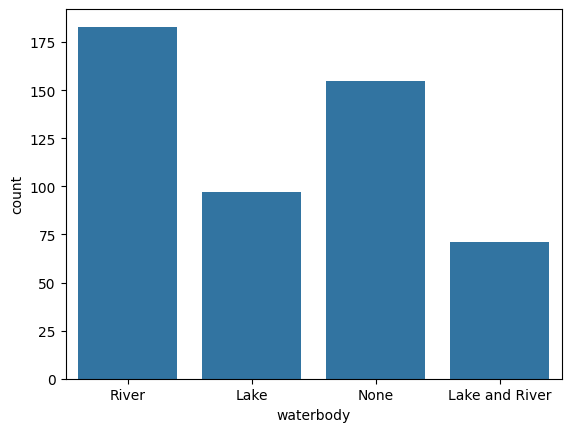

In [501]:
sns.countplot(x = "waterbody",  data = df)

<Axes: xlabel='bus_ter', ylabel='count'>

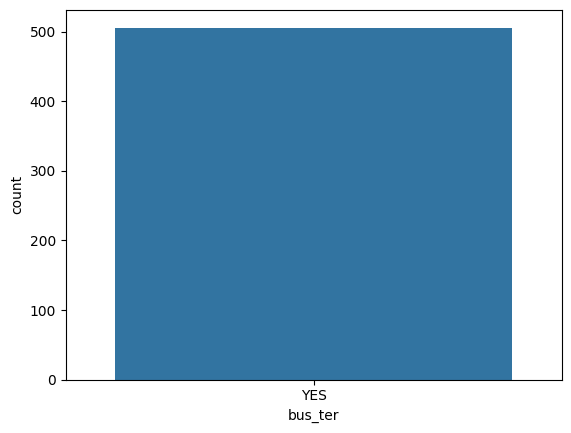

In [502]:
# bus_ter is not useful, because it takes only one value
sns.countplot(x = "bus_ter",  data = df)

### observations
- Missing values in n_hos_beds
- Skewness (or) outliers in crime_rate
- Outliers in n_hot_rooms and rainfall
- Bus_ter is only taking one value 

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

# Outlier treatment in python

In [504]:
np.percentile(df.n_hot_rooms, [99]) 

array([15.39952])

In [505]:
np.percentile(df.n_hot_rooms, [99])[0] # 99 percentile

15.39952

In [506]:
# upper value
uv = np.percentile(df.n_hot_rooms, [99])[0] # 99 percentile

In [507]:
df[(df.n_hot_rooms) > uv] # all the rows where n_hot_rooms > uv
# We can identify outliers in data like this

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [508]:
# Taking multiplication factor 3
# capping the values
#               The values which are greater than 3*uv is replaced by 3*uv
df.n_hot_rooms[(df.n_hot_rooms) > 3*uv] = 3 * uv

C:\Users\chsan\AppData\Local\Temp\ipykernel_24712\2328739270.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.n_hot_rooms[(df.n_hot_rooms) > 3*uv] = 3 * uv
C:\Users\chsan\AppData\Local\Temp\ipykernel_24712\2328739270.py:4: SettingWithC

In [509]:
# observe
#       That the outlier values are replaced by 3*99_percentile_value
df[(df.n_hot_rooms) > uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [510]:
# lets identify outliers in rain fall

# lv : lower_value (1st percentile value)
lv = np.percentile(df.rainfall , [1])[0]
lv

20.0

In [511]:
# identifying outliers
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [512]:
# capping the outlier value
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

C:\Users\chsan\AppData\Local\Temp\ipykernel_24712\3702036677.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv
C:\Users\chsan\AppData\Local\Temp\ipykernel_24712\3702036677.py:2: SettingWithCopyW

In [513]:
# observe that the outlier value is incresed (to minizie the outlier negative effects)
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


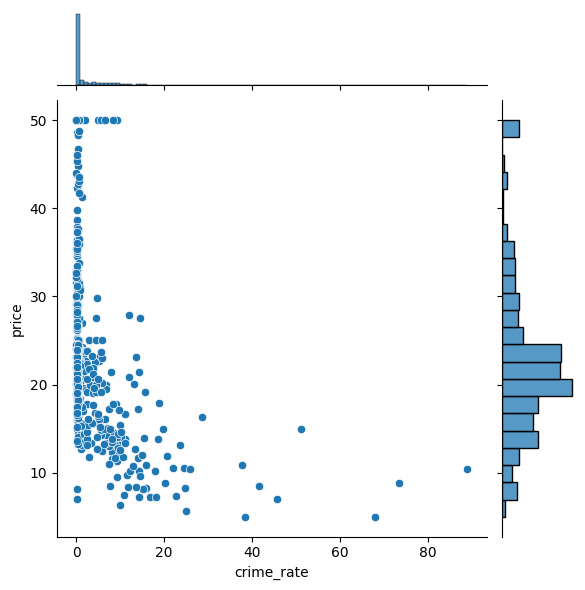

In [514]:
sns.jointplot(x = "crime_rate", y = "price", data = df)

In [515]:
# By transforming some variables we can get nice relationships
# take 1, 10, 100. 
# 100 looks like outlier 
# but need not be!!
# if the relation is transfoed to 10^x scale, the values will become 0, 1, 2
# Which does not seem like outliers

In [516]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


# Missing value imputation in python

In [517]:
# Check for missing values in 'waterbody' column
missing_values = df['waterbody'].isnull()
print(missing_values)

# Count the number of missing values in 'waterbody' column
missing_count = df['waterbody'].isnull().sum()
print(f"Number of missing values in 'waterbody': {missing_count}")


0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: waterbody, Length: 506, dtype: bool
Number of missing values in 'waterbody': 0


In [518]:
# Describe the DataFrame including all columns
df_description = df.describe(include='all')
print(df_description)


             price  crime_rate  resid_area    air_qual    room_num  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     22.528854    3.613524   41.136779    0.554695    6.284634   
std       9.182176    8.601545    6.860353    0.115878    0.702617   
min       5.000000    0.006320   30.460000    0.385000    3.561000   
25%      17.025000    0.082045   35.190000    0.449000    5.885500   
50%      21.200000    0.256510   39.690000    0.538000    6.208500   
75%      25.000000    3.677083   48.100000    0.624000    6.623500   
max      50.000000   88.976200   57.740000    0.871000    8.780000   

               age       dist1       dist2       dist3       dist4  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN 

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [520]:
df.n_hos_beds.fillna(df.n_hos_beds.mean).isnull().sum()

0

In [521]:
df.n_hos_beds.isnull().sum()

8

In [522]:
# there are missing values in n_hos_beds
# treating missing values 
# replacing missingvalues with mean
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [523]:
df.n_hos_beds.isnull().sum()

0

In [524]:
# No mssing values !!
# Hurray!!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [525]:
# The following will replace every missing value with mean
# But this is not recommended, because missing value in different variables should be treated differently
# df = df.fillna(df.mean)

# Variable transformation and deletion in python

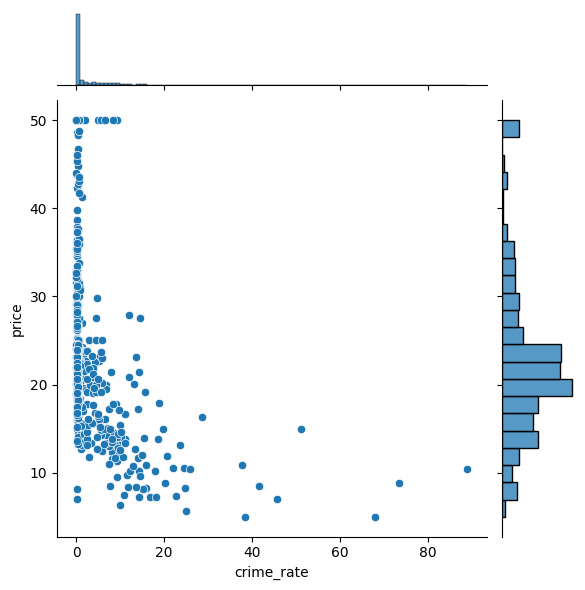

In [526]:
sns.jointplot(x = "crime_rate", y = "price", data = df)

In [527]:
# sns.pairplot(df)

In [528]:
# we can see that more is the crime rate less is the price of House

In [529]:
# varaible transfomration
df.crime_rate = np.log(1 + df.crime_rate)

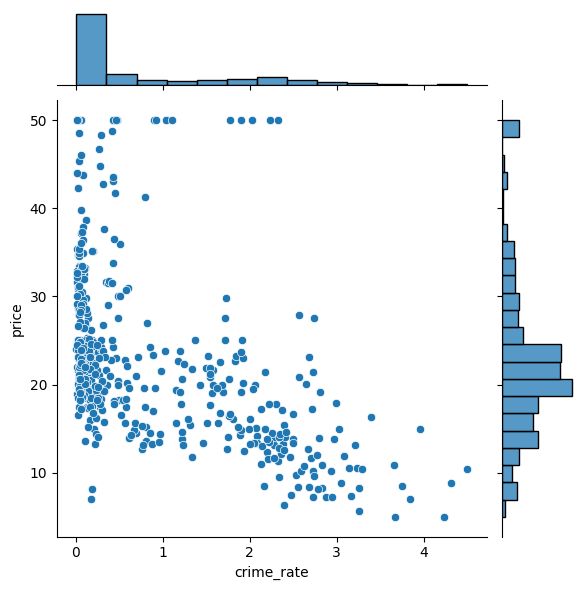

In [530]:
# This plot is more linear than earlier
sns.jointplot(x = "crime_rate", y = "price", data = df)

In [531]:
# sns.pairplot(df)

In [532]:
temp_df = pd.read_csv("C:/Users/chsan/OneDrive/Desktop/ML/course1/data/House_price.csv", header = 0, na_values = [''], keep_default_na = False)

In [533]:
# varaible transfomration
temp_df.crime_rate = 1/(1+temp_df.crime_rate)

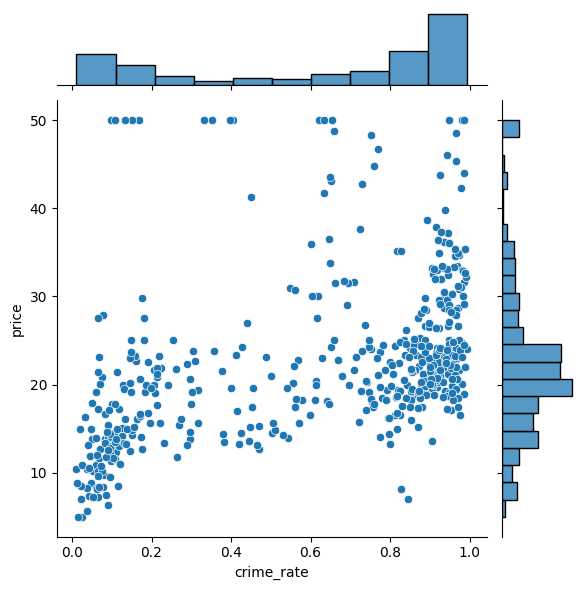

In [534]:
# not linear, not right lineat transformation
sns.jointplot(x = "crime_rate", y = "price", data = temp_df)

In [535]:
# sns.pairplot(temp_df)

In [536]:
# now let us replce dist1, dist2, dist3 and dist4 with mean

In [537]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [538]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625


In [539]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [540]:
# you can also take min distance

In [541]:
# min distance also makes sense
# If we assume that min_dis is going to matter for price of a house
temp_df = df.copy(deep = True)
temp_df['min_dis'] = np.min(temp_df[['dist1', 'dist2', 'dist3', 'dist4']], axis = 1) # axis = 1 to take row wise min

In [542]:
temp_df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist,min_dis
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875,3.81
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675,4.70
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675,4.86
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650,5.93
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625,5.86


In [543]:
# deleting distances
del df['dist1']

In [544]:
del df['dist2']
del df['dist3']
del df['dist4']

In [545]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625


In [546]:
# Bus_ter is not useful
del df['bus_ter']

In [547]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,6.0625


# Dummy variable creation

In [548]:
# Number of new dummy variables need to be created for a variable of 'd' lebels is d-1

In [549]:
# There are 4 categoreis of water_body
# lake
# river
# lake and river
# None

In [550]:
df = pd.get_dummies(df, columns = ['waterbody', 'airport'])

In [551]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,airport_NO,airport_YES
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,False,False,False,True,False,True
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,True,False,False,False,True,False
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,False,False,True,False,True,False
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,True,False,False,False,False,True
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,True,False,False,False,True,False


The get_dummies function in pandas is used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions. This process is known as one-hot encoding. One-hot encoding transforms categorical data into binary vectors, where each unique value in a category becomes a column, and the presence of a value is marked with a 1, while the absence is marked with a 0.

In [552]:
del df['airport_NO']

In [553]:
del df['waterbody_None']

In [554]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,waterbody_Lake,waterbody_Lake and River,waterbody_River,airport_YES
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,False,False,True,True
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,True,False,False,False
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,False,False,False,False
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,True,False,False,True
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,True,False,False,False


# Correlation analysis 

In [555]:
# Get data types of all columns
column_types = df.dtypes

print("Data types of all columns:")
print(column_types)

Data types of all columns:
price                       float64
crime_rate                  float64
resid_area                  float64
air_qual                    float64
room_num                    float64
age                         float64
teachers                    float64
poor_prop                   float64
n_hos_beds                  float64
n_hot_rooms                 float64
rainfall                      int64
parks                       float64
avg_dist                    float64
waterbody_Lake                 bool
waterbody_Lake and River       bool
waterbody_River                bool
airport_YES                    bool
dtype: object


In [556]:
# ????????????????????????????????????????????????????????????

In [557]:
# there is some problem with n_hos_beds, it has object data type. But it should be float64
# Convert 'n_hos_beds' column to float64, coerce non-numeric values to NaN
df['n_hos_beds'] = pd.to_numeric(df['n_hos_beds'], errors='coerce')

# Check the data types of all columns again
print(df.dtypes)

price                       float64
crime_rate                  float64
resid_area                  float64
air_qual                    float64
room_num                    float64
age                         float64
teachers                    float64
poor_prop                   float64
n_hos_beds                  float64
n_hot_rooms                 float64
rainfall                      int64
parks                       float64
avg_dist                    float64
waterbody_Lake                 bool
waterbody_Lake and River       bool
waterbody_River                bool
airport_YES                    bool
dtype: object


In [558]:
# getting correlation matrix
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,waterbody_Lake,waterbody_Lake and River,waterbody_River,airport_YES
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.036233,-0.037497,0.071751,0.182867
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.025390,0.009076,-0.060099,-0.134486
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.026590,0.051649,-0.098976,-0.115401
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.046393,0.013849,-0.037772,-0.073903
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,-0.004195,0.010554,0.046251,0.163774
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.003452,-0.004354,-0.088609,0.005101
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.048717,-0.046981,0.094256,0.069437
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,0.003197,0.020620,-0.109004,-0.095054
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,0.042278,0.059482,-0.074148,-0.006365
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,0.037925,0.014755,-0.064096,-0.055338


- If there are high number of variables, we can delete in-significant variables by looking at correlation matrix.
- Some inferences from above correlation matrix:
    1) for example, price and poor poluation (poor_prop) are highly negatively correlated. (So poor population highly affects price of a house!!)

Correlation matrix helps in identifying how much each independent variable can affect dependent variable.

In [559]:
# air_qual and parks are highly correlated 
# It makes sense to delete one of them, as if you dont delete then it may lead to multi-correleanrity
# I decided to drop parks as air_qual and price have high correlation than parks and price
del df['parks']

In [560]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,waterbody_Lake,waterbody_Lake and River,waterbody_River,airport_YES
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,False,False,True,True
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,True,False,False,False
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,False,False,False,False
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,True,False,False,True
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,True,False,False,False


# Actual code starts from here, before this is just data pre-processing which is done in stage4

In [561]:
import statsmodels.api as sn

In [562]:
# Let us build simple linear regression model 
# where the independent variable is 'room_num'

In [563]:
# Add a constant (intercept) to the model 
X = sn.add_constant(df['room_num']) 

In [564]:
X

,const,room_num
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
...,...,...
501,1.0,6.593
502,1.0,6.120
503,1.0,6.976
504,1.0,6.794


- In the context of machine learning in Python, OLS stands for Ordinary Least Squares. It is a method for estimating the parameters in a linear regression model. The goal of OLS is to find the line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences (the residuals) between the observed values and the values predicted by the linear model.
- The statsmodels library provides a detailed summary of the regression results, while scikit-learn offers a more straightforward implementation with easy-to-use methods for fitting the model and making predictions. In both examples (see below), the models are trained to find the best-fit line for the given data using the OLS method

In [565]:
# fit the model using OLS method
lm = sn.OLS(df['price'], X).fit()

In [566]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.31e-74
Time:                        15:54:40   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Price = (-34.6592) + (9.0997)*Room_num
- P > |t| is very small, so there is a signifact relation between room_num and price 

In [567]:
# another method (most commonly used) to perform linear regression

In [568]:
from sklearn.linear_model import LinearRegression

 the operation df[['room_num']] does indeed create a 2-dimensional DataFrame from a single column. This is a feature of pandas DataFrames. When you use double square brackets [[...]], pandas returns a DataFrame, which is inherently 2-dimensional, even if it contains only one column.

- df['room_num']: This would return a pandas Series, which is a 1-dimensional array.
- df[['room_num']]: This returns a DataFrame, which is 2-dimensional, with one column.

In [569]:
y = df['price']
x = df[['room_num']] # x should be 2-dimension

In [570]:
x.shape

(506, 1)

In [571]:
y.shape

(506,)

In [572]:
lm2 = LinearRegression()

In [573]:
lm2.fit(x, y)

LinearRegression()

In [574]:
print(lm2.intercept_, lm2.coef_)

-34.659243123097184 [9.09966966]


In [575]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speed

In [576]:
# predicted values of y
lm2.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [577]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(data=None, *, x=None, y=None, hue=None, kind='scatter', height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.

    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.

    Parameters
    ----------
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form dataset that will be internally
        reshaped.
    x, y : vectors or keys in ``data``
        Variables that sp

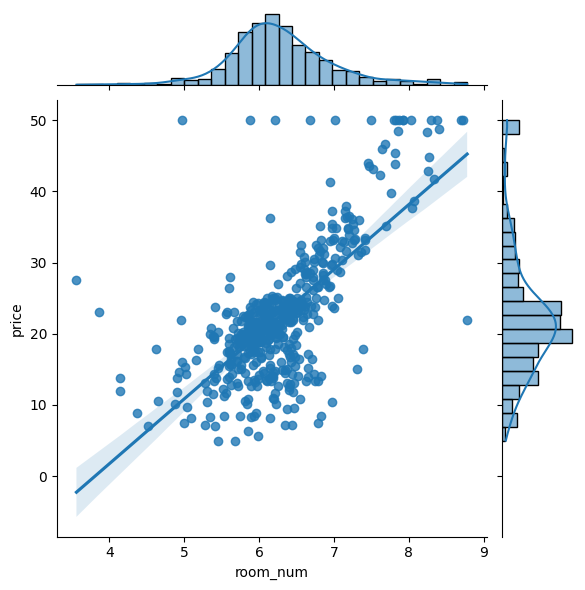

In [578]:
sns.jointplot(x = df['room_num'], y = df['price'], data = df, kind = 'reg')

## Multiple linear regression model

In [579]:
# doing with both statmodels and sklearn libraries

In [580]:
# getting indepedent variables
X_multi = df.drop("price", axis = 1)
# we want all the variables in df except price
# axis = 0 is for dropping rows
# axis = 1 is for droping cols
# here we are dropping price column

In [581]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,waterbody_Lake,waterbody_Lake and River,waterbody_River,airport_YES
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,False,False,True,True
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,True,False,False,False
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,False,False,False,False
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,True,False,False,True
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,True,False,False,False


In [582]:
# dependent variable
y_multi = df['price']

In [583]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [584]:
X_multi_cons = sn.add_constant(X_multi)

In [585]:
X_multi_cons.head()
# we can see const column in data

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,waterbody_Lake,waterbody_Lake and River,waterbody_River,airport_YES
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,False,False,True,True
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,True,False,False,False
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,False,False,False,False
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,True,False,False,True
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,True,False,False,False


In [586]:
X_multi_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     506 non-null    float64
 1   crime_rate                506 non-null    float64
 2   resid_area                506 non-null    float64
 3   air_qual                  506 non-null    float64
 4   room_num                  506 non-null    float64
 5   age                       506 non-null    float64
 6   teachers                  506 non-null    float64
 7   poor_prop                 506 non-null    float64
 8   n_hos_beds                506 non-null    float64
 9   n_hot_rooms               506 non-null    float64
 10  rainfall                  506 non-null    int64  
 11  avg_dist                  506 non-null    float64
 12  waterbody_Lake            506 non-null    bool   
 13  waterbody_Lake and River  506 non-null    bool   
 14  waterbody_

In [587]:
X_multi_cons.dtypes

const                       float64
crime_rate                  float64
resid_area                  float64
air_qual                    float64
room_num                    float64
age                         float64
teachers                    float64
poor_prop                   float64
n_hos_beds                  float64
n_hot_rooms                 float64
rainfall                      int64
avg_dist                    float64
waterbody_Lake                 bool
waterbody_Lake and River       bool
waterbody_River                bool
airport_YES                    bool
dtype: object

In [589]:
# OLS - Ordinary Least Square
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [590]:
help(sn.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |
 |  Ordinary Least Squares
 |
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result stati

In [591]:
# The above error is duw to bool data type in X_multi
# This is fixed by below code
boolean_columns = X_multi_cons.select_dtypes(include=['bool']).columns
X_multi_cons[boolean_columns] = X_multi_cons[boolean_columns].astype(int)

In [592]:
X_multi_cons.describe()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,waterbody_Lake,waterbody_Lake and River,waterbody_River,airport_YES
count,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.0,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,3.795104,0.191700,0.140316,0.361660,0.551383
std,0.0,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,2.105859,0.394028,0.347659,0.480957,0.497845
min,1.0,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,1.127500,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,2.100625,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,3.207500,0.000000,0.000000,0.000000,1.000000
75%,1.0,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,5.187500,0.000000,0.000000,1.000000,1.000000
max,1.0,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,12.127500,1.000000,1.000000,1.000000,1.000000


In [593]:
X_multi_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     506 non-null    float64
 1   crime_rate                506 non-null    float64
 2   resid_area                506 non-null    float64
 3   air_qual                  506 non-null    float64
 4   room_num                  506 non-null    float64
 5   age                       506 non-null    float64
 6   teachers                  506 non-null    float64
 7   poor_prop                 506 non-null    float64
 8   n_hos_beds                506 non-null    float64
 9   n_hot_rooms               506 non-null    float64
 10  rainfall                  506 non-null    int64  
 11  avg_dist                  506 non-null    float64
 12  waterbody_Lake            506 non-null    int32  
 13  waterbody_Lake and River  506 non-null    int32  
 14  waterbody_

In [594]:
print(df['n_hos_beds'].isna().sum())
print(df['n_hos_beds'].dtype)
print(X_multi_cons.isna().sum())


0
float64
const                       0
crime_rate                  0
resid_area                  0
air_qual                    0
room_num                    0
age                         0
teachers                    0
poor_prop                   0
n_hos_beds                  0
n_hot_rooms                 0
rainfall                    0
avg_dist                    0
waterbody_Lake              0
waterbody_Lake and River    0
waterbody_River             0
airport_YES                 0
dtype: int64


In [595]:
# OLS - Ordinary Least Square
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [596]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          4.19e-125
Time:                        15:55:32   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [597]:
# Degree of freedom = n - p - 1
# 506 - 15 - 1 = 490 = degree of freedom
# n = count of data
# p = number of varibales

In [598]:
# Now let us use sk-learn libaray

In [599]:
lm3 = LinearRegression()

In [600]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [601]:
print(lm3.intercept_, lm3.coef_)

-6.498625198419731 [ 9.70998193e-03 -4.08746495e-02 -1.58973999e+01  4.01901676e+00
 -5.71475069e-03  1.00700068e+00 -5.77271243e-01  3.29221139e-01
  9.18675603e-02  1.61185504e-02 -1.21863952e+00  2.64086064e-01
 -6.87555889e-01 -2.91318712e-01  1.13151586e+00]


# Test train split

In [602]:
from sklearn.model_selection import train_test_split

In [609]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 0)
# fixing random_state ends up in returning same train and test data every time

In [610]:
X_train.describe()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.790302,41.123441,0.555886,6.301797,69.027228,21.537624,12.706188,7.878659,12.928270,39.173267,3.770285
std,0.998910,6.993011,0.115201,0.694692,28.106955,2.194821,7.299031,1.469822,2.890239,12.326601,2.080735
min,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,20.000000,1.175000
25%,0.075974,35.130000,0.449000,5.887750,45.675000,19.800000,6.727500,6.607000,11.210800,28.000000,2.089375
50%,0.228336,39.125000,0.538000,6.211000,77.950000,20.900000,11.300000,7.971000,13.109200,39.000000,3.191250
75%,1.472210,48.100000,0.631000,6.675000,93.900000,22.600000,17.112500,9.050000,14.173800,50.000000,5.142500
max,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,36.980000,10.876000,46.198560,60.000000,12.127500


In [611]:
X_test.describe()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.904975,41.189608,0.549979,6.216657,66.783333,21.571569,12.442647,7.983370,12.609686,39.245098,3.893407
std,1.112606,6.339877,0.118982,0.732735,28.382215,2.052498,6.507064,1.449578,1.653652,13.214481,2.210434
min,0.013508,30.740000,0.392000,3.863000,8.400000,18.800000,1.920000,5.292000,10.149600,6.000000,1.127500
25%,0.089946,35.885000,0.448000,5.881000,39.625000,19.800000,8.027500,6.832500,11.150800,27.000000,2.136250
50%,0.222251,39.900000,0.520000,6.157000,72.550000,21.300000,11.550000,7.963000,12.187200,40.000000,3.347500
75%,1.820582,48.100000,0.605000,6.469000,95.200000,23.100000,15.705000,9.102000,14.154200,52.000000,5.186875
max,4.311257,51.890000,0.871000,8.725000,100.000000,27.400000,37.970000,10.856000,15.266400,60.000000,10.712500


In [616]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 15), (102, 15), (404,), (102,))

In [617]:
lm_a = LinearRegression()

In [618]:
lm_a.fit(X_train, y_train)

LinearRegression()

In [622]:
# predicting values of test set
y_test_a = lm_a.predict(X_test) 

In [623]:
# predcting values of train set
y_train_a = lm_a.predict(X_train)

In [624]:
from sklearn.metrics import r2_score

In [627]:
# getting r square value for test set
r2_score(y_test, y_test_a)

0.5496468288205676

In [628]:
# getting r square value for train set
r2_score(y_train, y_train_a)

0.756463540591123

# Ridge and Lasso regression

In [629]:
# We need to standardize the data before running ridge and lasso

In [630]:
from sklearn import preprocessing

In [636]:
# standardizing the input data set

# storing the information how to divide each row and each cell
scaler = preprocessing.StandardScaler().fit(X_train)

In [637]:
# scalled variable X_train_s
X_train_s = scaler.transform(X_train)

In [639]:
# scalling test set
X_test_s = scaler.transform(X_test)

In [640]:
# Ridge regression
from sklearn.linear_model import Ridge

In [642]:
lm_r = Ridge(alpha = 0.5) # lambda = alpha in python
lm_r.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [643]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5494318046087936

In [644]:
# we want to find out the lambda value which makes R^2 value maximum

In [646]:
from sklearn.model_selection import validation_curve

In [647]:
validation_curve?

Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" method
    An object of that type which is cloned for each validation. It must
    also implement "predict" unless `scoring` is a callable that doesn't
    rely on "predict" to compute a score.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training vector, where `n_samples` i

In [650]:
param_range = np.logspace(-2, 8, 100)
# param_range will have 100 evenly spaced values between 10^-2 amd 10^8

In [651]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [660]:
# the validation_score is running k-fold validation behind the scenes
train_scores, test_scores = validation_curve(
    estimator=Ridge(),
    X=X_train_s,
    y=y_train,
    param_name="alpha",
    param_range=param_range,
    scoring="r2",
    cv=3  # Number of cross-validation folds
)


In [661]:
train_scores

array([[7.52194685e-01, 7.61666421e-01, 7.79533753e-01],
       [7.52194684e-01, 7.61666421e-01, 7.79533752e-01],
       [7.52194682e-01, 7.61666420e-01, 7.79533751e-01],
       [7.52194679e-01, 7.61666419e-01, 7.79533750e-01],
       [7.52194674e-01, 7.61666417e-01, 7.79533747e-01],
       [7.52194666e-01, 7.61666413e-01, 7.79533743e-01],
       [7.52194653e-01, 7.61666408e-01, 7.79533737e-01],
       [7.52194633e-01, 7.61666400e-01, 7.79533727e-01],
       [7.52194601e-01, 7.61666387e-01, 7.79533712e-01],
       [7.52194549e-01, 7.61666366e-01, 7.79533687e-01],
       [7.52194468e-01, 7.61666333e-01, 7.79533648e-01],
       [7.52194339e-01, 7.61666280e-01, 7.79533585e-01],
       [7.52194133e-01, 7.61666196e-01, 7.79533485e-01],
       [7.52193806e-01, 7.61666062e-01, 7.79533326e-01],
       [7.52193287e-01, 7.61665849e-01, 7.79533075e-01],
       [7.52192464e-01, 7.61665512e-01, 7.79532675e-01],
       [7.52191160e-01, 7.61664975e-01, 7.79532041e-01],
       [7.52189097e-01, 7.61664

In [662]:
print(test_scores)

[[ 7.35528776e-01  7.21571662e-01  7.01170916e-01]
 [ 7.35534039e-01  7.21572579e-01  7.01169489e-01]
 [ 7.35540679e-01  7.21573736e-01  7.01167687e-01]
 [ 7.35549055e-01  7.21575196e-01  7.01165414e-01]
 [ 7.35559620e-01  7.21577038e-01  7.01162546e-01]
 [ 7.35572945e-01  7.21579361e-01  7.01158926e-01]
 [ 7.35589750e-01  7.21582293e-01  7.01154358e-01]
 [ 7.35610939e-01  7.21585992e-01  7.01148594e-01]
 [ 7.35637651e-01  7.21590659e-01  7.01141320e-01]
 [ 7.35671316e-01  7.21596545e-01  7.01132141e-01]
 [ 7.35713733e-01  7.21603969e-01  7.01120557e-01]
 [ 7.35767153e-01  7.21613331e-01  7.01105939e-01]
 [ 7.35834399e-01  7.21625137e-01  7.01087490e-01]
 [ 7.35918995e-01  7.21640021e-01  7.01064206e-01]
 [ 7.36025332e-01  7.21658782e-01  7.01034818e-01]
 [ 7.36158863e-01  7.21682421e-01  7.00997726e-01]
 [ 7.36326331e-01  7.21712197e-01  7.00950906e-01]
 [ 7.36536029e-01  7.21749685e-01  7.00891802e-01]
 [ 7.36798081e-01  7.21796855e-01  7.00817186e-01]
 [ 7.37124738e-01  7.21856162e-

In [663]:
train_mean = np.mean(train_scores, axis = 1)

In [664]:
test_mean = np.mean(test_scores, axis = 1)

In [665]:

train_mean

array([7.64464953e-01, 7.64464952e-01, 7.64464951e-01, 7.64464949e-01,
       7.64464946e-01, 7.64464941e-01, 7.64464933e-01, 7.64464920e-01,
       7.64464900e-01, 7.64464867e-01, 7.64464816e-01, 7.64464734e-01,
       7.64464604e-01, 7.64464398e-01, 7.64464070e-01, 7.64463550e-01,
       7.64462725e-01, 7.64461419e-01, 7.64459353e-01, 7.64456091e-01,
       7.64450950e-01, 7.64442872e-01, 7.64430219e-01, 7.64410476e-01,
       7.64379825e-01, 7.64332515e-01, 7.64260009e-01, 7.64149809e-01,
       7.63983943e-01, 7.63737047e-01, 7.63374055e-01, 7.62847479e-01,
       7.62094256e-01, 7.61031995e-01, 7.59554333e-01, 7.57524980e-01,
       7.54770192e-01, 7.51070061e-01, 7.46150136e-01, 7.39676406e-01,
       7.31257767e-01, 7.20460047e-01, 7.06833664e-01, 6.89952978e-01,
       6.69460771e-01, 6.45108717e-01, 6.16786807e-01, 5.84541413e-01,
       5.48588621e-01, 5.09330249e-01, 4.67371597e-01, 4.23527416e-01,
       3.78796353e-01, 3.34291745e-01, 2.91135463e-01, 2.50339693e-01,
      

In [666]:
test_mean

array([ 7.19423785e-01,  7.19425369e-01,  7.19427367e-01,  7.19429888e-01,
        7.19433068e-01,  7.19437078e-01,  7.19442134e-01,  7.19448508e-01,
        7.19456543e-01,  7.19466667e-01,  7.19479420e-01,  7.19495474e-01,
        7.19515675e-01,  7.19541074e-01,  7.19572977e-01,  7.19613003e-01,
        7.19663145e-01,  7.19725839e-01,  7.19804040e-01,  7.19901292e-01,
        7.20021773e-01,  7.20170322e-01,  7.20352370e-01,  7.20573780e-01,
        7.20840476e-01,  7.21157821e-01,  7.21529604e-01,  7.21956537e-01,
        7.22434165e-01,  7.22950119e-01,  7.23480722e-01,  7.23987017e-01,
        7.24410277e-01,  7.24666987e-01,  7.24643052e-01,  7.24186862e-01,
        7.23100972e-01,  7.21132936e-01,  7.17967314e-01,  7.13222567e-01,
        7.06457641e-01,  6.97192387e-01,  6.84942840e-01,  6.69267193e-01,
        6.49813254e-01,  6.26356452e-01,  5.98821684e-01,  5.67291257e-01,
        5.32009233e-01,  4.93392486e-01,  4.52048403e-01,  4.08784577e-01,
        3.64588520e-01,  

In [668]:
# highest r^2 value
max(test_mean)

0.7246669870662997

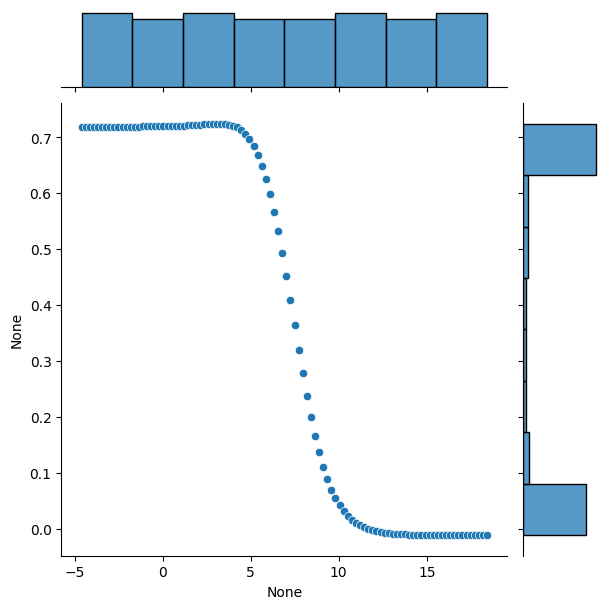

In [670]:
sns.jointplot(x = np.log(param_range), y = test_mean)

In [672]:
np.where(test_mean == max(test_mean))

(array([33], dtype=int64),)

In [673]:
# location is at 33rd index

In [675]:
# lamda value at which we are getting maximum r^2 value
param_range[33]

21.544346900318846

In [676]:
lm_r_best = Ridge(alpha = param_range[33])

In [678]:
lm_r_best.fit(X_train_s, y_train)

Ridge(alpha=21.544346900318846)

In [679]:

r2_score(y_test, lm_r_best.predict(X_test_s))

0.5406732551555002

In [680]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.7548323614349695

In [681]:
from sklearn.linear_model import Lasso

In [682]:
lm_l = Lasso(alpha = 0.4)

In [686]:
# Using Lasso in python is similar to using Ridge in python